## Third Part - Dispersion Relation
#### The Relation between the Coherence Length and the Reciprocal Vector in Bloch Model

In the third part, we aim to find out the relation between the coherence length and the reciprocal vector by looking into the phase difference caused by shifting the wavefunction in Bloch model. We set $h$ to be $h_c$ that we obtained in the first part.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import *
import scipy.sparse as sparse

In [2]:
Sx = np.array([[0,0.5],[0.5,0]])
Sy = np.array([[0,-0.5j],[0.5j,0]])
Sz = np.array([[0.5,0],[0,-0.5]])
I = np.array([[1,0],[0,1]])

# Useful algorithm: rotation
def Hx(N):
    M = [Sx]+ [I]*(N-1) + [Sx]+ [I]*(N-1)  #append: For example, [Sx, I, I, I] + [Sx, I, I, I] = [Sx, I, I, I, Sx, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = np.kron(tmp, M[i + j])  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hxx(N):
    M = [Sx]*2+ [I]*(N-2) + [Sx]*2+ [I]*(N-2)  #append: For example, [Sx, Sx, I, I] + [Sx, Sx, I, I] = [Sx, Sx, I, I, Sx, Sx, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = np.kron(tmp, M[i + j])  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hz(N):
    M = [Sz]+ [I]*(N-1) + [Sz]+ [I]*(N-1)  #append: For example, [Sz, I, I, I] + [Sz, I, I, I] = [Sz, I, I, I, Sz, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = np.kron(tmp, M[i + j])  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

To construct an operator that makes a series of spins do permutation by moving the last one to the first one, we make a matrix of $(2^N, 2^N)$.
For example:
Suppose that $1$ represents for spin up, and $0$ represents for spin down,
for a 4-spin system,

$1100$,

the arrangement of the spins will be

$0110$,

after the calculation with the shift operator $T$.

In [3]:
#construct T
#The operator for permutation of binary
def T(N):
    T = np.zeros([2**N, 2**N])
    for j in range(2**N):
        i = j//2 + (j%2)*(2**(N-1))
        T[i][j] = 1
    return T

Then, we tried to make a block diaganol matrix by multiplying the shift operator $T$ and the eigenstates of a 4-spin system. The block diaganol matrix is named as T_.

In [4]:
N = 4
J = 1
T_ = np.zeros([2**N, 2**N])
T_array = np.zeros(2**N)
h = 1/2
for N in [4]:       
    H = -J*Hxx(N)-h*Hz(N)
    w, v = np.linalg.eigh(H)
    T_ = np.transpose(v) @ T(N) @ v
    print("The block diaganol matrix T_ for N = 4 is:")
    print(T_)

The block diaganol matrix T_ for N = 4 is:
[[ 1.00000000e+00 -4.05346332e-17 -1.12146604e-16 -3.24460797e-17
  -6.44058971e-17  6.56247294e-17 -8.53345868e-18 -9.30024671e-18
  -3.23316721e-17 -3.36699853e-17  1.28426697e-17  7.08505361e-33
   1.25031662e-32 -1.20942323e-16 -1.85819394e-17 -3.14086586e-17]
 [-4.05346332e-17  1.00000000e+00  9.74775000e-17  3.19626174e-16
   5.54480773e-16  4.66929285e-17  1.38227039e-16  4.78712307e-17
   1.63544157e-17 -1.54206917e-17 -1.21249033e-18 -3.27936698e-17
   1.13870243e-16  8.71437385e-17 -4.73888484e-16 -8.88428252e-17]
 [-8.43910286e-17  9.74775000e-17  1.00000000e+00  1.29485810e-15
   8.06628451e-16 -2.75085994e-16 -5.37574712e-18  4.35587760e-17
   4.00492171e-17  8.31365045e-17 -2.92589116e-17 -4.56231578e-32
  -1.61885120e-31  2.38776877e-16  5.01210324e-17 -2.53423705e-17]
 [ 4.77822902e-17 -3.69880917e-16 -6.96716306e-16  9.56528082e-18
   1.00000000e+00 -4.24018273e-17 -5.54761834e-20  2.81890952e-16
  -1.76621284e-17  1.15409481e

Our aim is to find out the eigenvalues of each block matrices inside the block diaganol matrix. In order to do so, we need to determine how to divide these matrices. Since we know that for the last position of a complete matrix, the numbers on its right hand side and below it should all be zero, by adding the absolute values of these numbers and judging whether it's zero, we understand where the last position of each small matrix is and mark them in the list "block_position".

In [5]:
block_position = np.zeros(2**N)
for i in range(0, 2**N):
    x = 0
    for j in range(i + 1, 2**N):
        x += np.abs(T_[i][j])
    for k in range(i + 1, 2**N):
        x += np.abs(T_[k][i])
    if x < 10**(-10):
        block_position[i] = 1
print("The position of the last number in each small block matrix is:")
print(block_position)

The position of the last number in each small block matrix is:
[1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]


Here, we can see that in the list "block_position", 1 represents for the last position for each small matrices in the diaganol matrix. Then, we make use of this piece of information to read the original diaganol matrix with a 2D list "shell_matrix" by limiting the range of each small matrices. After reading one small matrix into the "shell_matrix", the eigenvalue of it is then calculated individually, saved in a new list "eigens".

In [6]:
eigens = []
tmp = 0
print("Each small block matrix is shown below in order:")
for i in range(0, 2**N):
    shell_matrix = np.zeros([i + 1 - tmp, i + 1 - tmp])
    if block_position[i] == 1:
        for j in range(0, i + 1 - tmp):
            for k in range(0, i + 1 - tmp):
                shell_matrix[j][k] = T_[j + tmp][k + tmp]
        tmp = i + 1
        w, v = np.linalg.eig(shell_matrix)
        print(shell_matrix)
        eigens += w.tolist()
print("-"* 100)
print("And the eigenvalues of each small block are:")
print(eigens)

Each small block matrix is shown below in order:
[[1.]]
[[1.]]
[[1.]]
[[ 9.56528082e-18  1.00000000e+00]
 [-1.00000000e+00  1.65917331e-17]]
[[-1.]]
[[-0.93268849 -0.18251551  0.31017602  0.02389791]
 [ 0.09770068 -0.6816493  -0.16177752  0.70684995]
 [ 0.01616091 -0.65580927 -0.28340387 -0.69952503]
 [ 0.34682213 -0.26824714  0.89291719 -0.10225834]]
[[1.]]
[[ 1.15603657e-17  1.00000000e+00]
 [-1.00000000e+00 -2.22019592e-18]]
[[1.]]
[[-1.]]
[[1.]]
----------------------------------------------------------------------------------------------------
And the eigenvalues of each small block are:
[0.9999999999999991, 0.9999999999999993, 0.9999999999999986, (1.3877787807814457e-17+0.9999999999999999j), (1.3877787807814457e-17-0.9999999999999999j), -1.0000000000000013, 1j, -1j, (-1.0000000000000004+0j), (-0.9999999999999998+0j), 1.0000000000000007, 1.0000000000000004j, -1.0000000000000004j, 0.9999999999999996, -1.0000000000000002, 0.9999999999999998]


Since we know that what a shift operator can do is to make a phase difference on the wavefunction, we can write:
$\hat{T}\psi = e^{-2\pi ik_i/N}\psi$.
Here, we can see that the eigenvalues $\lambda_i$s are the $e^{-2\pi ik_i}$s, so we construct $k_i$s by calculating:
$k_i = -Im(ln(\lambda_i))N/2\pi$

In [7]:
k = []
for i in range(0, 2**N):
    k = - np.log(eigens).imag*N/(2*np.pi)
print("The values of ks are:")
print(k)

The values of ks are:
[-0. -0. -0. -1.  1. -2. -1.  1. -2. -2. -0. -1.  1. -0. -2. -0.]


After obtaining the values of $k_i$s, we can plot the graph of the relation between $k$ and $N(E - E_0)/(2\pi)$.

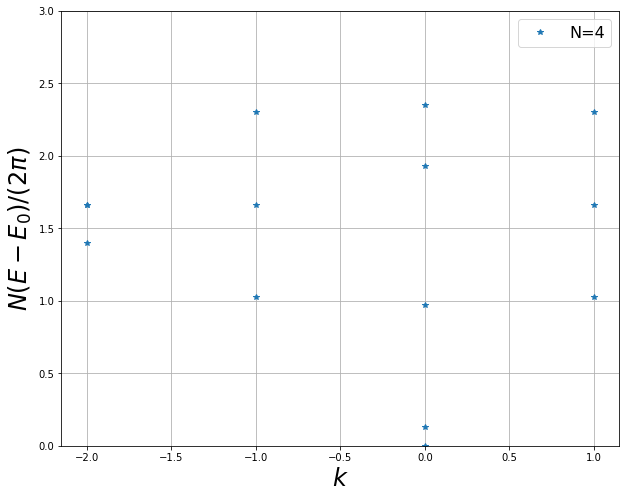

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))

for N in [4]:       
    H = -J*Hxx(N)-h*Hz(N)
    w, v = np.linalg.eigh(H)
    
    ax.plot(k, 2*N*(w - w[0])/(2*np.pi), '*', label='N={}'.format(N))
    ax.legend(fontsize=16)
    ax.set_ylim(0, 3)
    ax.set_xlabel(r'$k$',fontsize=24)
    ax.set_ylabel(r'$N(E - E_0)/(2\pi)$',fontsize=24)
    ax.grid()

In the end, since we've tested that the code works for $N = 4$, we now consider N = 4, 6, 8 and plot them in the same graph to show the relation between the coherence length and the reciprocal vector in Bloch Model. From the figure below, we can see that it forms a shape of cone.

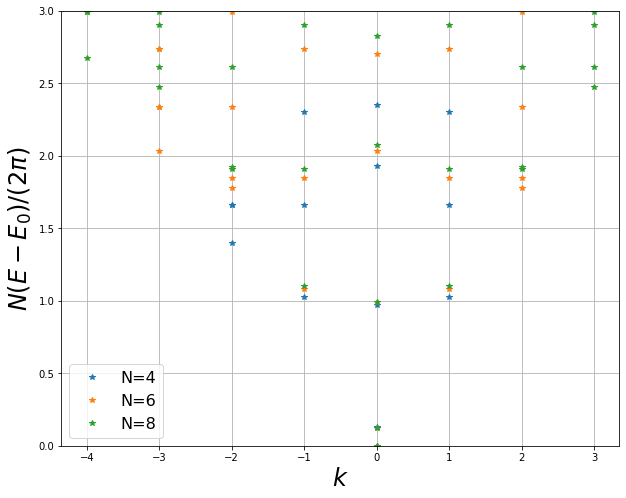

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))

T_ = np.zeros([2**N, 2**N])
T_array = np.zeros(2**N)
h = 1/2
for N in [4, 6, 8]:       
    H = -J*Hxx(N)-h*Hz(N)
    w, v = np.linalg.eigh(H)
    T_ = np.transpose(v) @ T(N) @ v
    block_position = np.zeros(2**N)
    
    for i in range(0, 2**N):
        x = 0
        for j in range(i + 1, 2**N):
            x += np.abs(T_[i][j])
        for k in range(i + 1, 2**N):
            x += np.abs(T_[k][i])
        if x < 10**(-10):
            block_position[i] = 1
    
    eigens = []
    tmp = 0
    for i in range(0, 2**N):
        shell_matrix = np.zeros([i + 1 - tmp, i + 1 - tmp])
        if block_position[i] == 1:
            for j in range(0, i + 1 - tmp):
                for k in range(0, i + 1 - tmp):
                    shell_matrix[j][k] = T_[j + tmp][k + tmp]
            tmp = i + 1
            w, v = np.linalg.eig(shell_matrix)
            eigens += w.tolist()
    
    k = []
    for i in range(0, 2**N):
        k = - np.log(eigens).imag*N/(2*np.pi)
        
    w, v = np.linalg.eigh(H)

    ax.plot(k, 2*N*(w - w[0])/(2*np.pi), '*', label='N={}'.format(N))
    ax.legend(fontsize=16)
    ax.set_ylim(0, 3)
    ax.set_xlabel(r'$k$',fontsize=24)
    ax.set_ylabel(r'$N(E - E_0)/(2\pi)$',fontsize=24)
    ax.grid()